# DAPL ML Zero - Getting Started with Machine Learning 
## Logistic Regression

Author: Spencer Bertsch  

The purpose of this notebook is to show the different types of supervised learning and a few very simple implementations of solutions. 

All data used in this notebook came from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets.php)

In [19]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.special import expit

In [4]:
p: str = os.path.abspath('')
base_path: str = p + '/data/'
print(f'Your data files should be in the following directory: {base_path}')

Your data files should be in the following directory: /Users/spencerbertsch/Desktop/dev/DAPL/ML_Intro/data/


### Logistic Regression

The goal here is to train a model how to **predict a binary category** based on a single or multiple predictor variables.

[Data source.](https://archive.ics.uci.edu/ml/datasets/iris)

Step 1: Read the data into memory using pandas

In [5]:
df_path: str = base_path + 'iris_dataset.csv'
df: pd.DataFrame = pd.read_csv(df_path, header=[0])
df.tail(5)

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

remove one class so that we have a **logistic** regression problem

In [8]:
df = df[df['class'] != 'Iris-virginica']

In [11]:
df['encoded_label'] = np.where(df['class']=='Iris-setosa', 1, 0)

In [28]:
df.head()

,sepal length,sepal width,petal length,petal width,class,encoded_label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [34]:
X = df['sepal width'].values
y = df['encoded_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

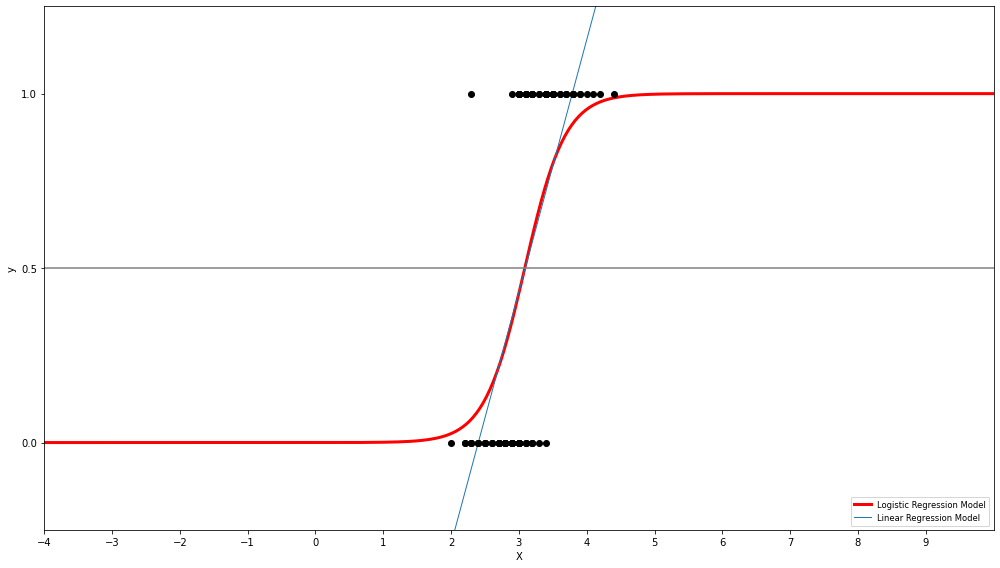

In [35]:
# Fit the classifier
clf = LogisticRegression()
clf.fit(X.reshape(-1, 1), y)

# and plot the result
plt.figure(1, figsize=(14, 8))
plt.clf()
plt.scatter(X.reshape(-1, 1), y, color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X.reshape(-1, 1), y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    ("Logistic Regression Model", "Linear Regression Model"),
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()